# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Read Data**

In [2]:
# import gdown

#from google.colab import files

#url = f"https://drive.google.com/uc?id=1-B3C1F1fzYb-tqseby07pGu-AoDo0Yj4&export=download"
#output = "zomato_updated.csv"

# Download the file
#gdown.download(url, output,quiet=False)

In [3]:
# Load the CSV file into a DataFrame
data = pd.read_csv(r"zomato.csv")
df = pd.DataFrame(data)

# **Data Understanding (EDA)**







In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


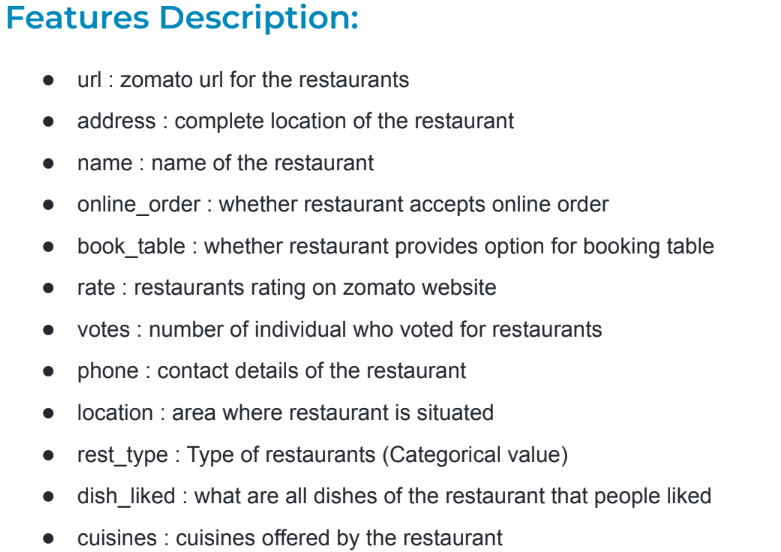

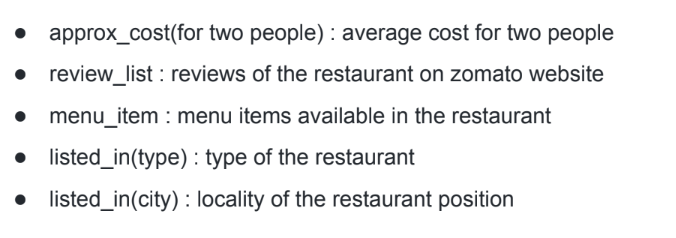

In [5]:
df.shape


(51717, 17)

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Selecting related columns to my target column(rate)

In [8]:
Concerned_col = df.drop(['url', 'phone', 'address','name', 'location'], axis=1)

Concerned_col

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6 /5,27,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,No,No,NaN,0,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,No,No,NaN,0,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,No,Yes,4.3 /5,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [9]:
#Concerned_col['approx_cost(for two people)'].apply(np.isinf)
Concerned_col['votes'].apply(np.isinf).unique()

array([False])

In [10]:
Concerned_col.shape

(51717, 12)

In [11]:
Concerned_col['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
Concerned_col['online_order'].describe()

count     51717
unique        2
top         Yes
freq      30444
Name: online_order, dtype: object

In [13]:
Concerned_col['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
Concerned_col['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
Concerned_col['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [16]:
Concerned_col['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [17]:
Concerned_col['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [18]:
Concerned_col['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [19]:
#'approx_cost(for two people)', 'reviews_list', 'menu_item',
  #     'listed_in(type)', 'listed_in(city)
Concerned_col['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [20]:
Concerned_col['reviews_list'].unique()

array(['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said th

In [21]:
Concerned_col['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [22]:
Concerned_col['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [23]:
Concerned_col['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

## **Check missing values**

In [24]:
Concerned_col.isnull().sum()

online_order                       0
book_table                         0
rate                            7775
votes                              0
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [25]:
Concerned_col.nunique()

online_order                       2
book_table                         2
rate                              64
votes                           2328
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

### **Numerical values check**

In [26]:
Concerned_col.dtypes

online_order                   object
book_table                     object
rate                           object
votes                           int64
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [27]:
Concerned_col.describe()
#IQR = Q3-Q1 = 198-7= 191
#l_b = 7 - (1.5*191) = -279.5
#u_b = 198 + (1.5*191) = 484.5
#there is an outlier , as max (16832) > upper bound (484.5)

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [28]:
Concerned_col.describe(include = ["O"])

,online_order,book_table,rate,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,43942,51490,23639,51672,51371,51717,51717,51717,51717
unique,2,2,64,93,5271,2723,70,22513,9098,7,30
top,Yes,No,NEW,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,30444,45268,2208,19132,182,2913,7576,7595,39617,25942,3279


## **Outliers Check**

<Axes: xlabel='votes'>

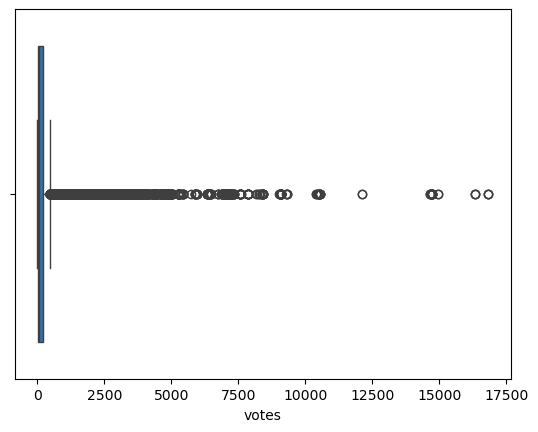

In [29]:
sns.boxplot(x = 'votes' ,data = Concerned_col)

## **Categorical Value check**

<Axes: xlabel='rate', ylabel='Count'>

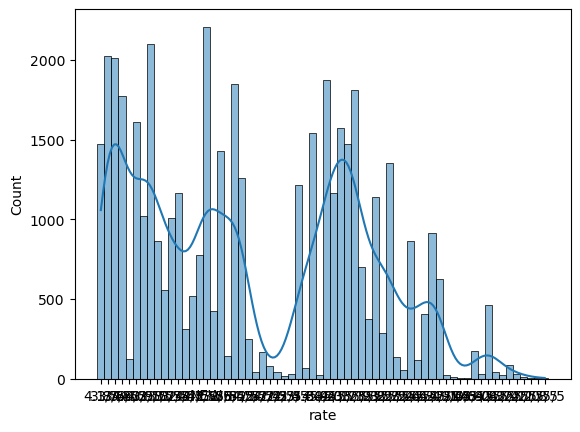

In [30]:
sns.histplot(Concerned_col['rate'],kde=True)

<Axes: xlabel='book_table', ylabel='count'>

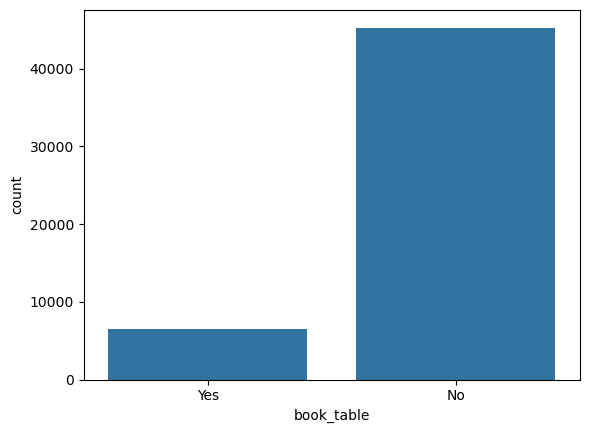

In [31]:
sns.countplot(x = 'book_table', data = Concerned_col)

<Axes: xlabel='online_order', ylabel='Count'>

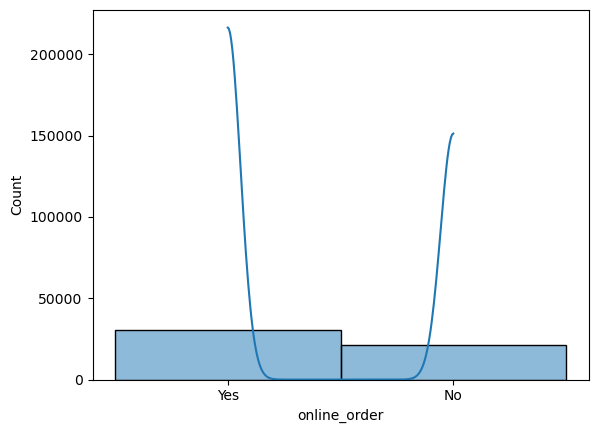

In [32]:
sns.histplot(Concerned_col['online_order'] , kde = True)

# **Data Cleaning**

## Drop duplicates

In [33]:
Concerned_col = Concerned_col.drop_duplicates()
Concerned_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51295 non-null  object
 1   book_table                   51295 non-null  object
 2   rate                         43885 non-null  object
 3   votes                        51295 non-null  int64 
 4   rest_type                    51070 non-null  object
 5   dish_liked                   23627 non-null  object
 6   cuisines                     51252 non-null  object
 7   approx_cost(for two people)  50953 non-null  object
 8   reviews_list                 51295 non-null  object
 9   menu_item                    51295 non-null  object
 10  listed_in(type)              51295 non-null  object
 11  listed_in(city)              51295 non-null  object
dtypes: int64(1), object(11)
memory usage: 5.1+ MB


In [34]:
Concerned_col.shape

(51295, 12)

## *Cleaning rate col from wrong values and converting its type*

In [35]:
Concerned_col['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [36]:
def clean_rating(value):
    if isinstance(value, str):
        value = value.strip().replace('/5', '').strip()  # Remove `/5` and extra spaces
        if value in ['NEW', '-', '']:  # Handle invalid values
            return np.nan
    return float(value) if pd.notna(value) else np.nan

Concerned_col['rate'] = Concerned_col['rate'].apply(clean_rating)


C:\Users\hp\AppData\Local\Temp\ipykernel_6584\159764156.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Concerned_col['rate'] = Concerned_col['rate'].apply(clean_rating)


In [37]:
Concerned_col['rate'].apply(np.isinf).unique()

array([False])

In [38]:
print(Concerned_col['rate'].unique())

[4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 nan 2.9 3.5
 2.6 3.4 4.5 2.5 2.7 4.7 2.4 2.2 2.3 4.8 4.9 2.1 2.  1.8]


In [39]:
Concerned_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51295 non-null  object 
 1   book_table                   51295 non-null  object 
 2   rate                         41626 non-null  float64
 3   votes                        51295 non-null  int64  
 4   rest_type                    51070 non-null  object 
 5   dish_liked                   23627 non-null  object 
 6   cuisines                     51252 non-null  object 
 7   approx_cost(for two people)  50953 non-null  object 
 8   reviews_list                 51295 non-null  object 
 9   menu_item                    51295 non-null  object 
 10  listed_in(type)              51295 non-null  object 
 11  listed_in(city)              51295 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.1+ MB


#### Dealing null values with rate col exist

In [40]:
all_null_rows = Concerned_col.isnull().all(axis=1)

In [41]:
#check if there is a whole row with null values
Concerned_col[Concerned_col['rate'].isnull() & all_null_rows]

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [42]:
Concerned_col['rate'].describe()
## check outliers -> they exist

count    41626.000000
mean         3.700521
std          0.440588
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [43]:
Concerned_col['rate'].isnull().sum()

9669

<Axes: xlabel='rate'>

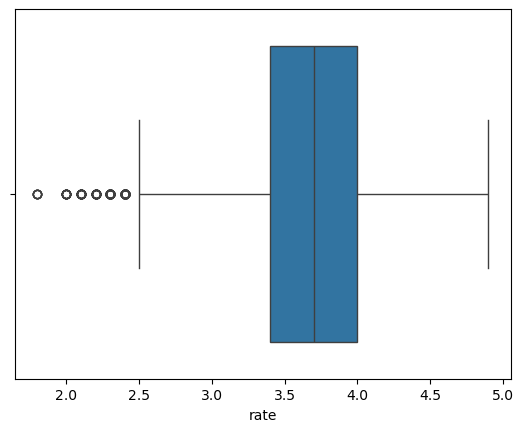

In [44]:
sns.boxplot(x='rate',data=Concerned_col)
#sns.stripplot(x='rate', data=Concerned_col, color="#474640")

In [45]:
#filling null values with meadian value
med = Concerned_col['rate'].median()
Concerned_col['rate'].fillna(med,inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6584\1946408693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Concerned_col['rate'].fillna(med,inplace = True)


In [46]:
Concerned_col['rate'].isnull().sum()

0

In [47]:
Concerned_col['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [48]:
Q1 = Concerned_col['rate'].quantile(0.25)
Q3 = Concerned_col['rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = Concerned_col[(Concerned_col['rate'] < lower_bound) | (Concerned_col['rate'] > upper_bound)]
print(outliers)

      online_order book_table  rate  votes            rest_type  \
7              Yes        Yes   4.6   2556  Casual Dining, Cafe   
31             Yes         No   2.8    506          Quick Bites   
36             Yes         No   2.8     91          Quick Bites   
44             Yes        Yes   4.6   2556  Casual Dining, Cafe   
73              No         No   2.9     84             Delivery   
...            ...        ...   ...    ...                  ...   
51677           No         No   2.5     81   Casual Dining, Bar   
51685           No        Yes   4.7   7064    Microbrewery, Pub   
51686           No         No   4.6   5954    Microbrewery, Pub   
51708           No         No   2.8    161   Casual Dining, Bar   
51711           No         No   2.5     81   Casual Dining, Bar   

                                              dish_liked  \
7      Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
31     Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
36             

In [49]:
#Concerned_col['rate'] = np.clip(Concerned_col['rate'], lower_bound, upper_bound)


<Axes: xlabel='rate'>

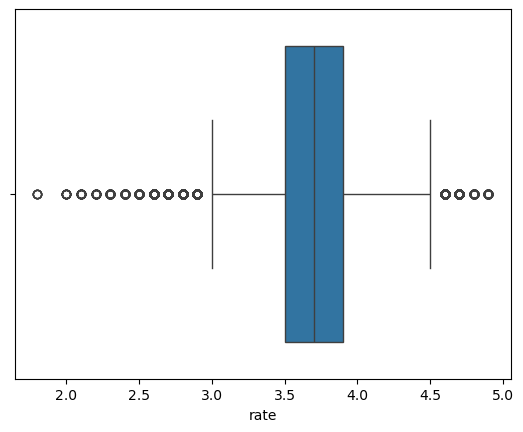

In [50]:
sns.boxplot(x='rate',data=Concerned_col) #these outliers represnt a part of rates not outliers in my view

<Axes: xlabel='rate', ylabel='Count'>

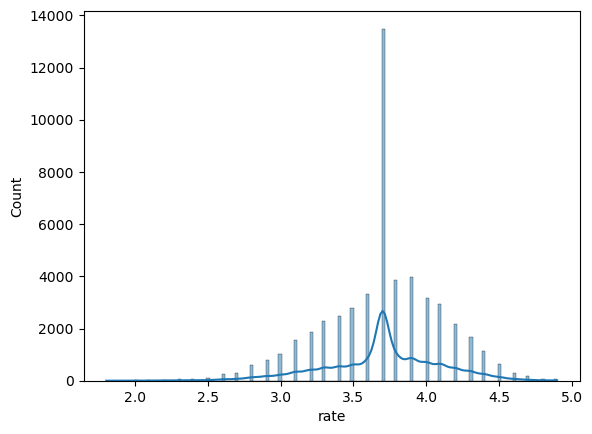

In [51]:
sns.histplot(Concerned_col['rate'],kde=True)

In [52]:
Concerned_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51295 non-null  object 
 1   book_table                   51295 non-null  object 
 2   rate                         51295 non-null  float64
 3   votes                        51295 non-null  int64  
 4   rest_type                    51070 non-null  object 
 5   dish_liked                   23627 non-null  object 
 6   cuisines                     51252 non-null  object 
 7   approx_cost(for two people)  50953 non-null  object 
 8   reviews_list                 51295 non-null  object 
 9   menu_item                    51295 non-null  object 
 10  listed_in(type)              51295 non-null  object 
 11  listed_in(city)              51295 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.1+ MB


In [53]:
Concerned_col.isnull().sum()

online_order                       0
book_table                         0
rate                               0
votes                              0
rest_type                        225
dish_liked                     27668
cuisines                          43
approx_cost(for two people)      342
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [54]:
Concerned_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51295 non-null  object 
 1   book_table                   51295 non-null  object 
 2   rate                         51295 non-null  float64
 3   votes                        51295 non-null  int64  
 4   rest_type                    51070 non-null  object 
 5   dish_liked                   23627 non-null  object 
 6   cuisines                     51252 non-null  object 
 7   approx_cost(for two people)  50953 non-null  object 
 8   reviews_list                 51295 non-null  object 
 9   menu_item                    51295 non-null  object 
 10  listed_in(type)              51295 non-null  object 
 11  listed_in(city)              51295 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.1+ MB


In [55]:
Concerned_col.describe(include = ['O'])

,online_order,book_table,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51295,51295,51070,23627,51252,50953,51295,51295,51295,51295
unique,2,2,93,5271,2723,70,22513,9098,7,30
top,Yes,No,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,30376,44856,18815,182,2842,7454,7220,39211,25781,3245


## *Adjust approx_cost col type*

In [56]:
Concerned_col['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [57]:
def clean_value(value):
    if isinstance(value, str):
        value = value.replace(',', '').strip()  # Remove commas and extra spaces
    return float(value) if pd.notna(value) else np.nan

Concerned_col['approx_cost(for two people)'] = Concerned_col['approx_cost(for two people)'].apply(clean_value)

C:\Users\hp\AppData\Local\Temp\ipykernel_6584\3055834747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Concerned_col['approx_cost(for two people)'] = Concerned_col['approx_cost(for two people)'].apply(clean_value)


In [58]:
Concerned_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51295 non-null  object 
 1   book_table                   51295 non-null  object 
 2   rate                         51295 non-null  float64
 3   votes                        51295 non-null  int64  
 4   rest_type                    51070 non-null  object 
 5   dish_liked                   23627 non-null  object 
 6   cuisines                     51252 non-null  object 
 7   approx_cost(for two people)  50953 non-null  float64
 8   reviews_list                 51295 non-null  object 
 9   menu_item                    51295 non-null  object 
 10  listed_in(type)              51295 non-null  object 
 11  listed_in(city)              51295 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


In [59]:
Concerned_col.nunique()


online_order                       2
book_table                         2
rate                              31
votes                           2328
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [60]:
#check if there is a whole row with null values
Concerned_col[Concerned_col["approx_cost(for two people)"].isnull() & all_null_rows ]

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [61]:
Concerned_col["approx_cost(for two people)"].describe()

#there are outliers

count    50953.000000
mean       557.605538
std        439.685361
min         40.000000
25%        300.000000
50%        400.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

<Axes: xlabel='approx_cost(for two people)'>

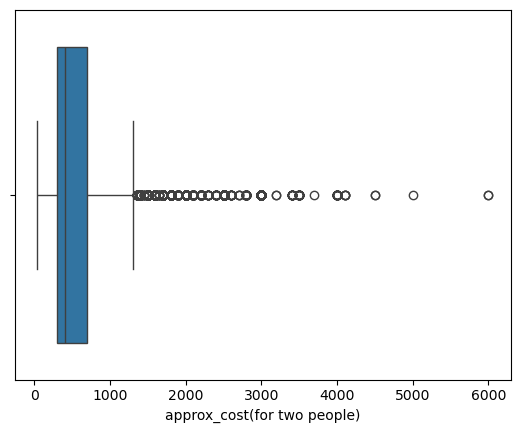

In [62]:
sns.boxplot(x='approx_cost(for two people)',data=Concerned_col)

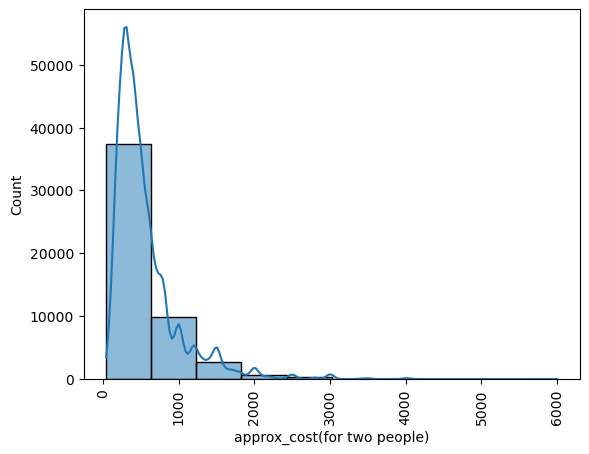

In [63]:
sns.histplot(x = Concerned_col['approx_cost(for two people)'] ,bins = 10, kde = True )
plt.xticks(rotation = 90)
plt.show()

In [64]:
Concerned_col['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [65]:
#filling null values in "approx_cost(for two people)" with median value as outliers exist
med2 = Concerned_col["approx_cost(for two people)"].median()
Concerned_col["approx_cost(for two people)"].fillna(med2 ,inplace = True)
Concerned_col["approx_cost(for two people)"].unique()

C:\Users\hp\AppData\Local\Temp\ipykernel_6584\3869812226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Concerned_col["approx_cost(for two people)"].fillna(med2 ,inplace = True)


array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [66]:
Concerned_col["approx_cost(for two people)"].describe()

count    51295.000000
mean       556.554732
std        438.404786
min         40.000000
25%        300.000000
50%        400.000000
75%        675.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

In [67]:
Concerned_col.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [68]:
Concerned_col["approx_cost(for two people)"].isnull().sum()

0

In [69]:
Concerned_col = Concerned_col.rename(columns={"approx_cost(for two people)": "AppCost_2humans"})

In [70]:
Concerned_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     51295 non-null  object 
 1   book_table       51295 non-null  object 
 2   rate             51295 non-null  float64
 3   votes            51295 non-null  int64  
 4   rest_type        51070 non-null  object 
 5   dish_liked       23627 non-null  object 
 6   cuisines         51252 non-null  object 
 7   AppCost_2humans  51295 non-null  float64
 8   reviews_list     51295 non-null  object 
 9   menu_item        51295 non-null  object 
 10  listed_in(type)  51295 non-null  object 
 11  listed_in(city)  51295 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


## Replacing outliers with median of approx_cost

In [71]:
Q1_cost = Concerned_col['AppCost_2humans'].quantile(0.25)
Q3_cost = Concerned_col['AppCost_2humans'].quantile(0.75)
IQR_cost = Q3_cost - Q1_cost

lower_bound_cost = Q1_cost - 1.5 * IQR_cost
upper_bound_cost = Q3_cost + 1.5 * IQR_cost

outliers_cost = Concerned_col[(Concerned_col['AppCost_2humans'] < lower_bound_cost) | (Concerned_col['AppCost_2humans'] > upper_bound_cost)]
print(upper_bound_cost)

1237.5


In [72]:

Concerned_col['AppCost_2humans'] = Concerned_col['AppCost_2humans'].mask(
    (Concerned_col['AppCost_2humans'] < lower_bound_cost) | 
    (Concerned_col['AppCost_2humans'] > upper_bound_cost),
    med2)



In [73]:
Concerned_col['AppCost_2humans'].describe()

count    51295.000000
mean       457.046008
std        241.526185
min         40.000000
25%        300.000000
50%        400.000000
75%        600.000000
max       1200.000000
Name: AppCost_2humans, dtype: float64

<Axes: xlabel='AppCost_2humans'>

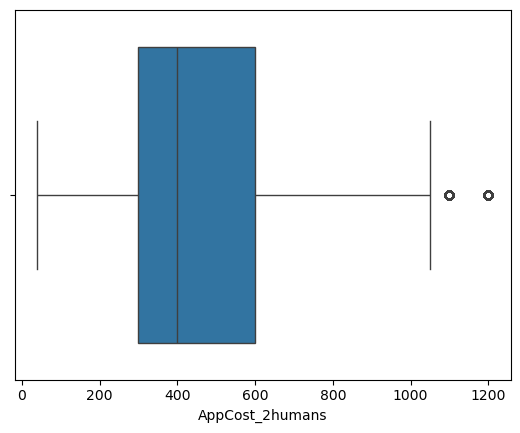

In [74]:
sns.boxplot(x='AppCost_2humans',data=Concerned_col)

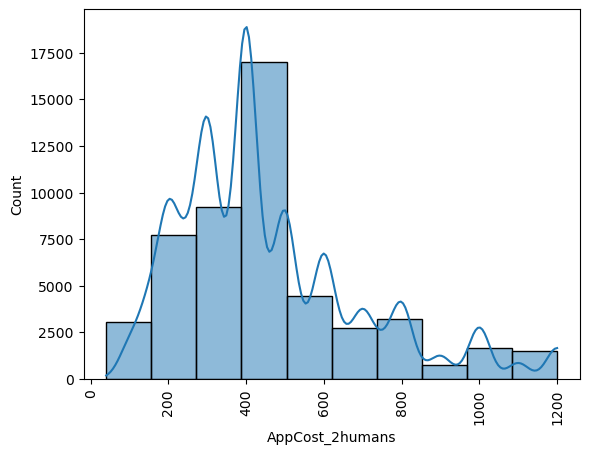

In [75]:
sns.histplot(x = Concerned_col['AppCost_2humans'] ,bins = 10, kde = True )
plt.xticks(rotation = 90)
plt.show()

In [76]:
Concerned_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     51295 non-null  object 
 1   book_table       51295 non-null  object 
 2   rate             51295 non-null  float64
 3   votes            51295 non-null  int64  
 4   rest_type        51070 non-null  object 
 5   dish_liked       23627 non-null  object 
 6   cuisines         51252 non-null  object 
 7   AppCost_2humans  51295 non-null  float64
 8   reviews_list     51295 non-null  object 
 9   menu_item        51295 non-null  object 
 10  listed_in(type)  51295 non-null  object 
 11  listed_in(city)  51295 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


## *Filling nulls of categorical columns*

In [77]:
Concerned_col.isnull().sum()

online_order           0
book_table             0
rate                   0
votes                  0
rest_type            225
dish_liked         27668
cuisines              43
AppCost_2humans        0
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
dtype: int64

In [78]:
Concerned_col['dish_liked'] = Concerned_col['dish_liked'].fillna(Concerned_col['dish_liked'].mode()[0])
Concerned_col['cuisines'] = Concerned_col['cuisines'].fillna(Concerned_col['cuisines'].mode()[0])
Concerned_col['rest_type'] = Concerned_col['rest_type'].fillna(Concerned_col['rest_type'].mode()[0])

In [79]:
Concerned_col.isnull().sum()

online_order       0
book_table         0
rate               0
votes              0
rest_type          0
dish_liked         0
cuisines           0
AppCost_2humans    0
reviews_list       0
menu_item          0
listed_in(type)    0
listed_in(city)    0
dtype: int64

<Axes: xlabel='dish_liked'>

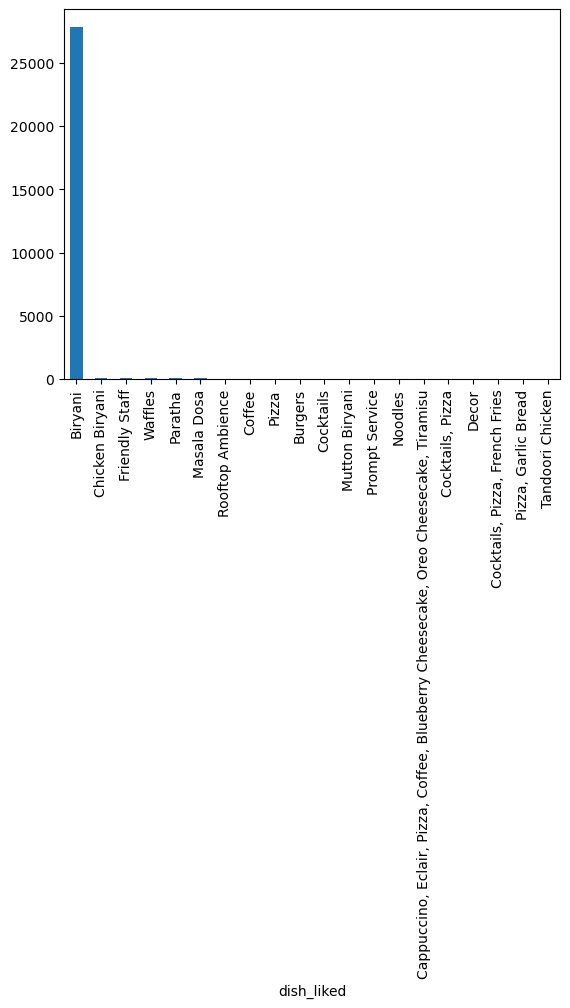

In [80]:
top_n = 20  # Show only the top 20 categories
Concerned_col['dish_liked'].value_counts().nlargest(top_n).plot(kind='bar')


<Axes: xlabel='cuisines'>

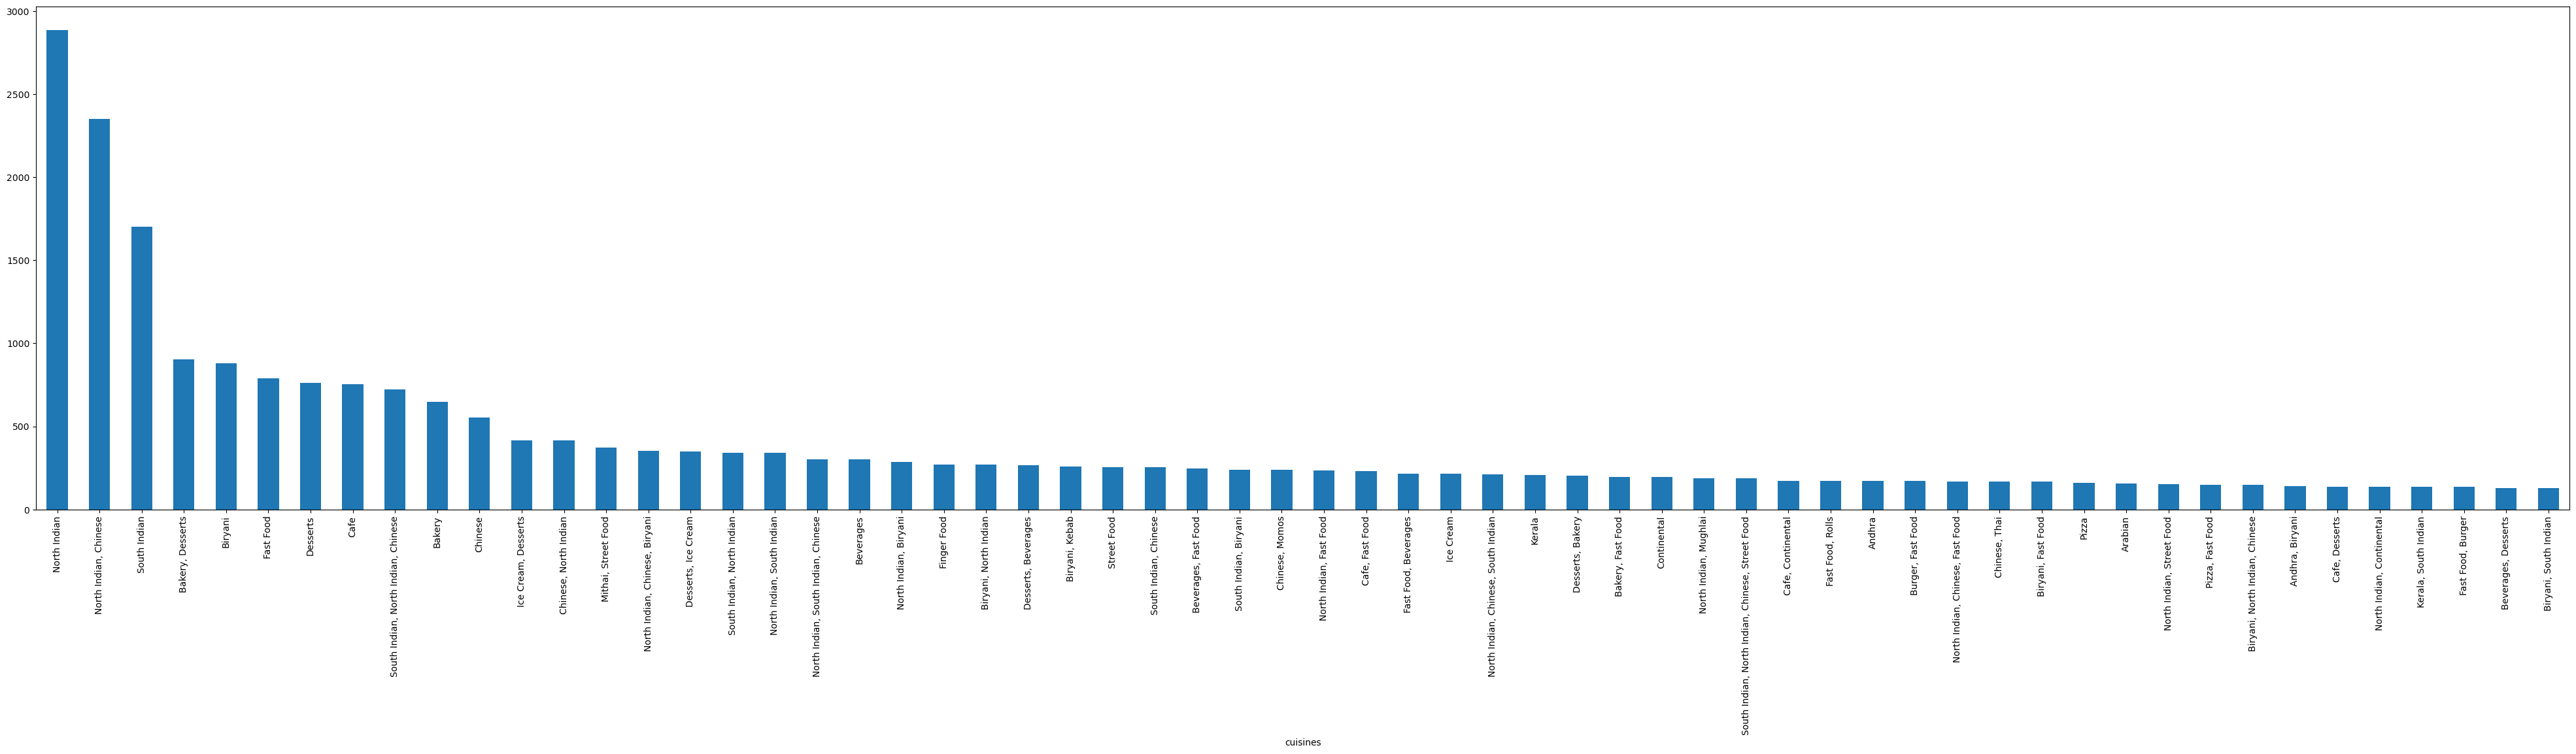

In [81]:
top_n = 60  # Show only the top 20 categories
Concerned_col['cuisines'].value_counts().nlargest(top_n).plot(kind='bar', figsize=(50, 10))


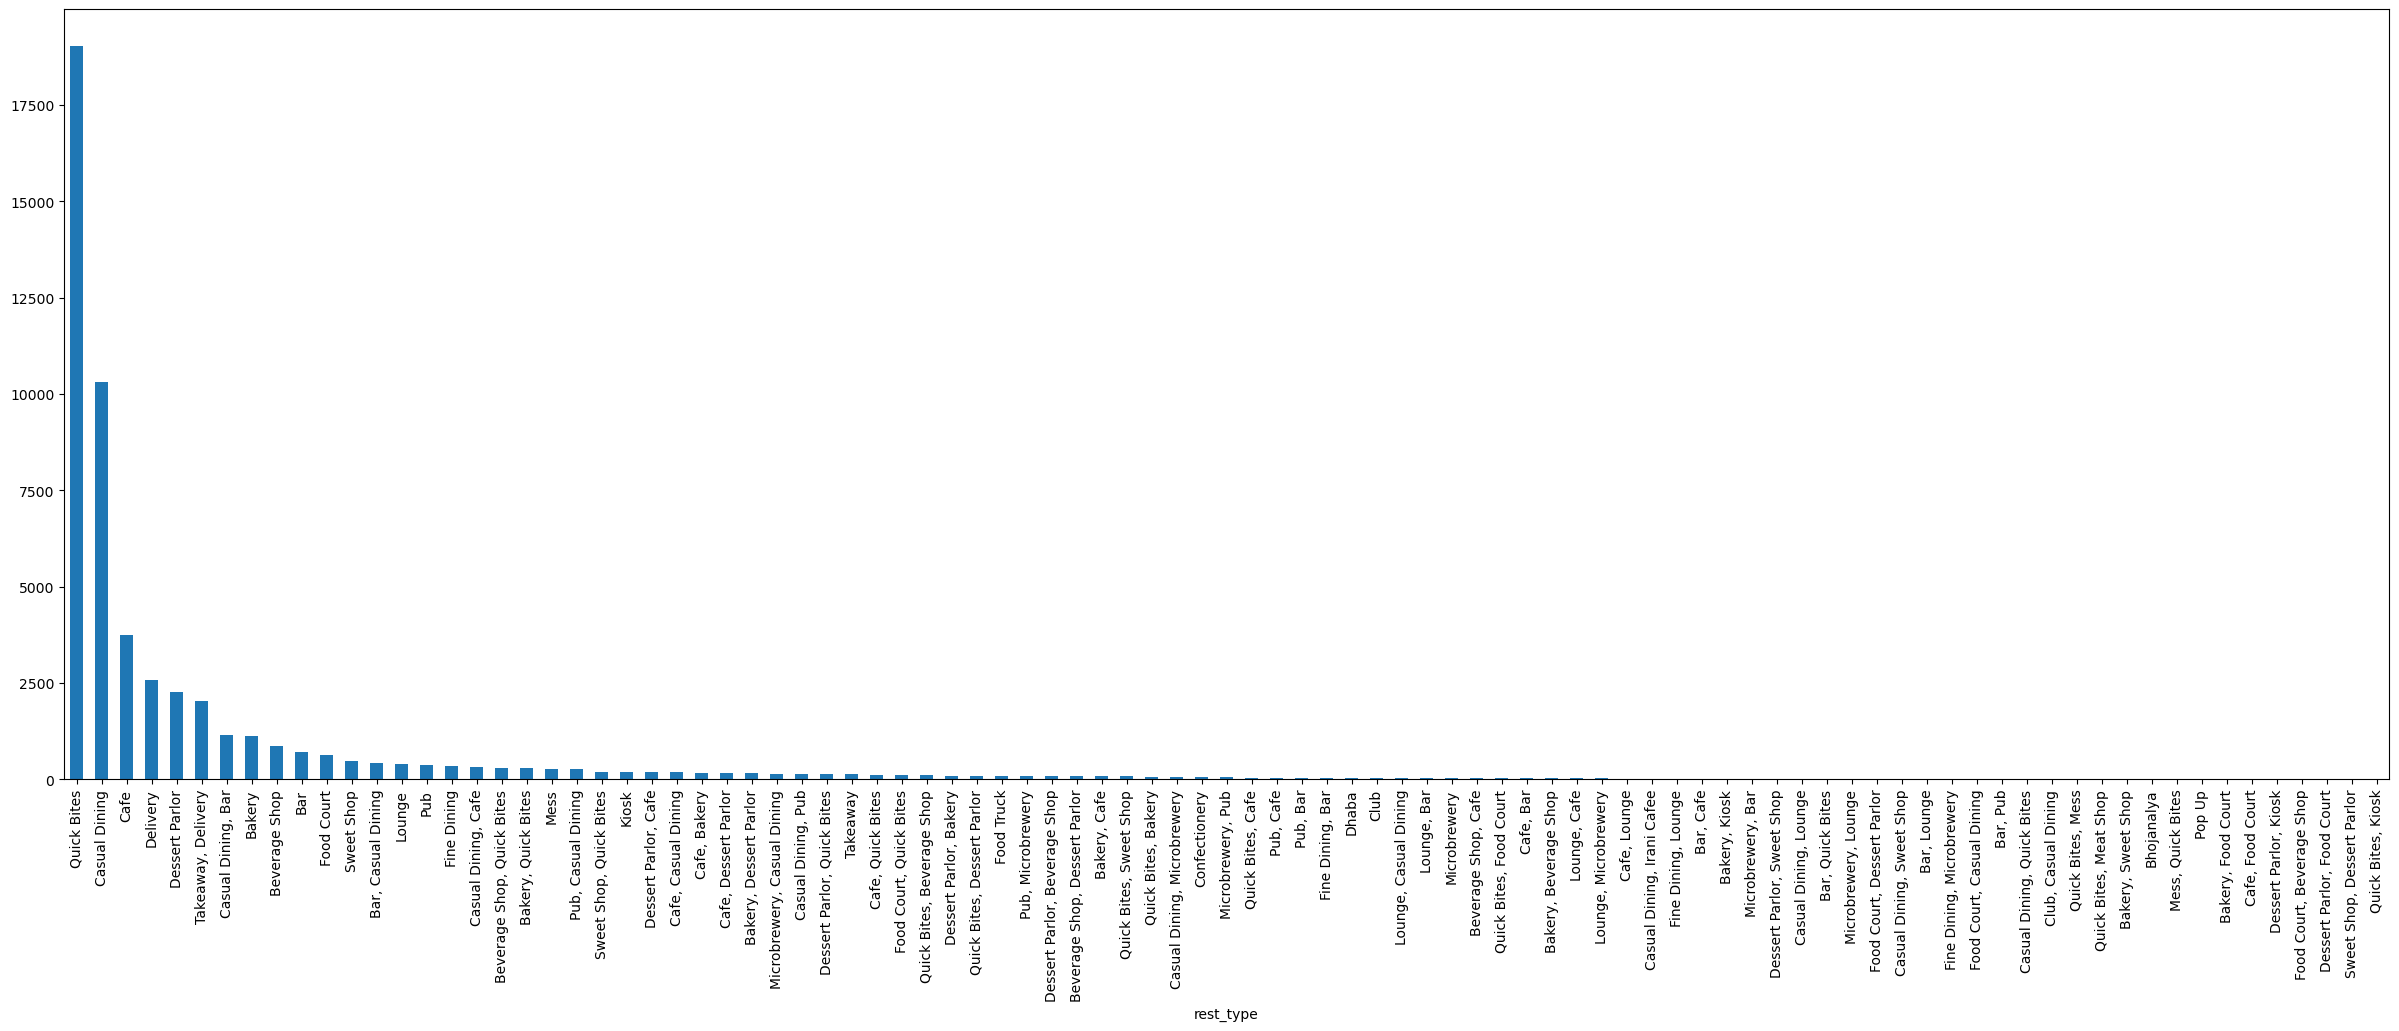

In [82]:
Concerned_col['rest_type'].value_counts().plot(kind='bar', figsize=(30, 10))
plt.xticks(rotation=90)
plt.show()

## *Replace [] with nan in menu_item col then filling them*

In [83]:
Concerned_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     51295 non-null  object 
 1   book_table       51295 non-null  object 
 2   rate             51295 non-null  float64
 3   votes            51295 non-null  int64  
 4   rest_type        51295 non-null  object 
 5   dish_liked       51295 non-null  object 
 6   cuisines         51295 non-null  object 
 7   AppCost_2humans  51295 non-null  float64
 8   reviews_list     51295 non-null  object 
 9   menu_item        51295 non-null  object 
 10  listed_in(type)  51295 non-null  object 
 11  listed_in(city)  51295 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


In [84]:
Concerned_col['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [85]:
def replace_empty_with_nan(array):
    # Convert the array to a pandas Series for easier replacement
    series = pd.Series(array)
    # Replace '[]' with np.nan
    series.replace('[]', np.nan, inplace=True)
    # Convert back to a numpy array if needed
    return series.to_numpy()
Concerned_col["menu_item"] = replace_empty_with_nan(Concerned_col["menu_item"])
Concerned_col["menu_item"].unique()

array([nan,
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Cheese

In [86]:
Concerned_col['menu_item'].fillna('UnSpecified',inplace = True)
Concerned_col['menu_item'].isnull().sum()

0

In [87]:
Concerned_col['menu_item'].unique()

array(['UnSpecified',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)

### *Attempt to clean up data of menu_item*

In [88]:
#removing () and its content
Concerned_col["menu_item"] = Concerned_col["menu_item"].str.replace(r"\s*\(.*?\)", "", regex=True)
Concerned_col['menu_item'].unique()

array(['UnSpecified',
       "['Chocolate Fantasy', 'Pan Cake', 'Gulab Jamun', 'Gulkand Shot', 'Chocolate Decadence', 'CheeseCake', 'Red Velvet Slice Cake', 'Red Velvet Slice Cake & Cheese Cake', 'Red Velvet Slice Cake & Chocolate Decadence Cake', 'Hazelnut Brownie', 'Moments', 'Red Velvet Cake With Butter Cream Frosting', 'Red Velvet Slice Cake', 'Red Velvet Slice Cake & Cheese Cake', 'Red Velvet Slice Cake & Chocolate Decadence Cake', 'Red Velvet Slice Cake', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie', 'Gulab Jamun', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting', 'Chocolate Mud Cake', 'CheeseCake', 'Chocolate Decadence', 'Red Velvet Slice Cake']",
       "['Chole Kulcha Meal', 'Upvas Aloo Paratha With Dahi', 'Singhada Aloo Paratha with Hare Tamatar Ki Sabji', 'Smoked Butter Chicken Combo', 'Paneer M

In [89]:
# Remove all backslashes
Concerned_col['menu_item'] = Concerned_col['menu_item'].str.replace(r"\\", "", regex=True)

Concerned_col['menu_item'].unique()

array(['UnSpecified',
       "['Chocolate Fantasy', 'Pan Cake', 'Gulab Jamun', 'Gulkand Shot', 'Chocolate Decadence', 'CheeseCake', 'Red Velvet Slice Cake', 'Red Velvet Slice Cake & Cheese Cake', 'Red Velvet Slice Cake & Chocolate Decadence Cake', 'Hazelnut Brownie', 'Moments', 'Red Velvet Cake With Butter Cream Frosting', 'Red Velvet Slice Cake', 'Red Velvet Slice Cake & Cheese Cake', 'Red Velvet Slice Cake & Chocolate Decadence Cake', 'Red Velvet Slice Cake', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie', 'Gulab Jamun', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting', 'Chocolate Mud Cake', 'CheeseCake', 'Chocolate Decadence', 'Red Velvet Slice Cake']",
       "['Chole Kulcha Meal', 'Upvas Aloo Paratha With Dahi', 'Singhada Aloo Paratha with Hare Tamatar Ki Sabji', 'Smoked Butter Chicken Combo', 'Paneer M

## *Solving problems of 'reviews_list' col*

In [90]:
Concerned_col["reviews_list"].unique()

array(['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said th

In [91]:
Concerned_col["reviews_list"].head()

0    [('Rated 4.0', 'RATED\n  A beautiful place to ...
1    [('Rated 4.0', 'RATED\n  Had been here for din...
2    [('Rated 3.0', "RATED\n  Ambience is not that ...
3    [('Rated 4.0', "RATED\n  Great food and proper...
4    [('Rated 4.0', 'RATED\n  Very good restaurant ...
Name: reviews_list, dtype: object

In [92]:
Concerned_col['reviews_list'].shape

(51295,)

In [93]:
# Extract ratings using a regex
#*Deriving extracted_rate col from reviews with which can be used in  filling null values in rate *
Concerned_col['extracted_rate'] = Concerned_col['reviews_list'].str.extract(r"Rated\s([\d.]+)")

In [94]:
Concerned_col['extracted_rate']= Concerned_col['extracted_rate'].apply(lambda x : float(x))
Concerned_col['extracted_rate']

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: extracted_rate, Length: 51295, dtype: float64

In [95]:
import re

# Assuming Concerned_col is a DataFrame
#def clean_reviews_list(reviews):
#    return [re.sub(r'.*\\n', '', review) for _, review in eval(reviews)]

#Concerned_col["reviews_list"] = Concerned_col["reviews_list"].apply(clean_reviews_list)

In [96]:
Concerned_col["reviews_list"]

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
51712    [('Rated 5.0', "RATED\n  Food and service are ...
51713                                                   []
51714                                                   []
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
51716    [('Rated 5.0', 'RATED\n  Great ambience , look...
Name: reviews_list, Length: 51295, dtype: object

In [97]:
Concerned_col.dtypes

online_order        object
book_table          object
rate               float64
votes                int64
rest_type           object
dish_liked          object
cuisines            object
AppCost_2humans    float64
reviews_list        object
menu_item           object
listed_in(type)     object
listed_in(city)     object
extracted_rate     float64
dtype: object

In [98]:
#def clean_reviews_list(reviews):
    # Ensure we're working with a list
#   return [re.sub(r'.*?\n\s*', '', review) for review in reviews]

# Apply the cleaning function to the column
#Concerned_col["reviews_list"] = Concerned_col["reviews_list"].apply(clean_reviews_list)

In [99]:
Concerned_col["reviews_list"]

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
51712    [('Rated 5.0', "RATED\n  Food and service are ...
51713                                                   []
51714                                                   []
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
51716    [('Rated 5.0', 'RATED\n  Great ambience , look...
Name: reviews_list, Length: 51295, dtype: object

In [100]:
Concerned_col.drop('reviews_list' , axis = 1 ,inplace = True)

In [101]:
Concerned_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     51295 non-null  object 
 1   book_table       51295 non-null  object 
 2   rate             51295 non-null  float64
 3   votes            51295 non-null  int64  
 4   rest_type        51295 non-null  object 
 5   dish_liked       51295 non-null  object 
 6   cuisines         51295 non-null  object 
 7   AppCost_2humans  51295 non-null  float64
 8   menu_item        51295 non-null  object 
 9   listed_in(type)  51295 non-null  object 
 10  listed_in(city)  51295 non-null  object 
 11  extracted_rate   44075 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 5.1+ MB


In [102]:
Concerned_col.drop("extracted_rate", axis = 1 ,inplace =True )

In [103]:
Concerned_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     51295 non-null  object 
 1   book_table       51295 non-null  object 
 2   rate             51295 non-null  float64
 3   votes            51295 non-null  int64  
 4   rest_type        51295 non-null  object 
 5   dish_liked       51295 non-null  object 
 6   cuisines         51295 non-null  object 
 7   AppCost_2humans  51295 non-null  float64
 8   menu_item        51295 non-null  object 
 9   listed_in(type)  51295 non-null  object 
 10  listed_in(city)  51295 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.7+ MB


## *Handling Votes' problems*

In [104]:
Concerned_col["votes"].info()

<class 'pandas.core.series.Series'>
Index: 51295 entries, 0 to 51716
Series name: votes
Non-Null Count  Dtype
--------------  -----
51295 non-null  int64
dtypes: int64(1)
memory usage: 801.5 KB


<Axes: xlabel='votes'>

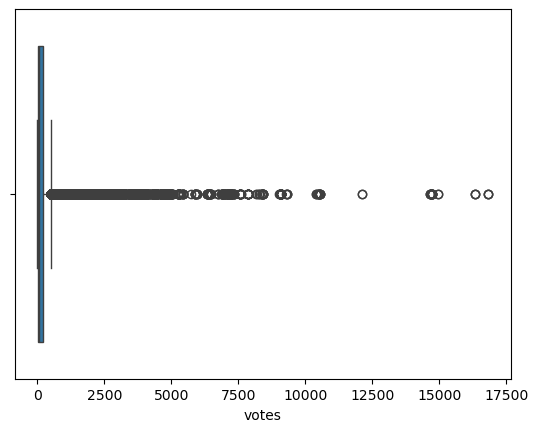

In [105]:
sns.boxplot(x='votes',data= Concerned_col)

<Axes: xlabel='votes', ylabel='Count'>

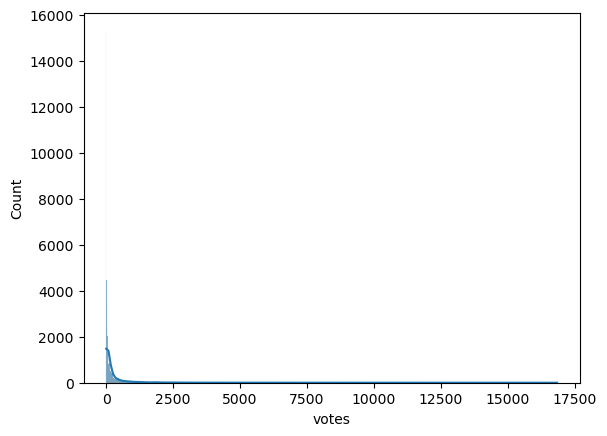

In [106]:
sns.histplot(Concerned_col['votes'],kde=True)

### Replacing 0 to null then filling null with median values of votes column

In [107]:

Concerned_col['votes'] = Concerned_col['votes'].replace(0, np.nan)
Concerned_col['votes'].fillna(Concerned_col['votes'].median(), inplace=True)  # Replace with median


In [108]:
Concerned_col[Concerned_col['votes']==0]

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,AppCost_2humans,menu_item,listed_in(type),listed_in(city)


<Axes: xlabel='votes'>

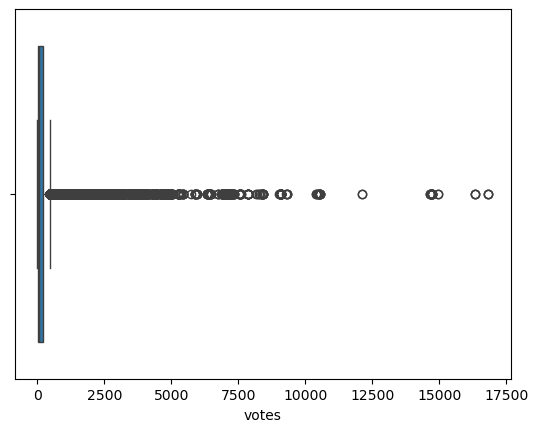

In [109]:
sns.boxplot(x='votes',data= Concerned_col)


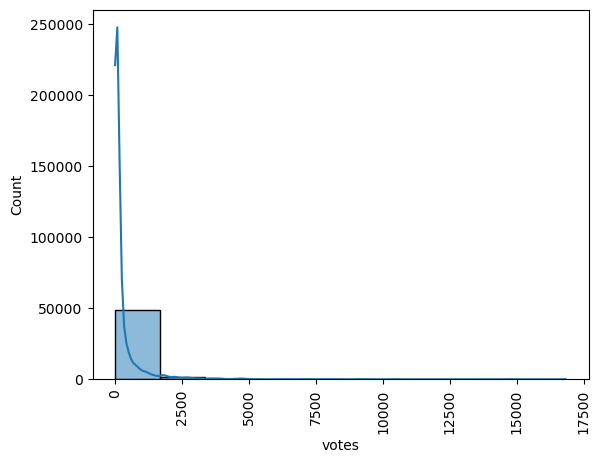

In [110]:
sns.histplot(x = Concerned_col['votes'] ,bins = 10, kde = True )
plt.xticks(rotation = 90)
plt.show()

### Using log transform to reduce that skewness

In [111]:
Concerned_col['votes_log'] = np.log1p(Concerned_col['votes'])

<Axes: xlabel='votes_log', ylabel='Count'>

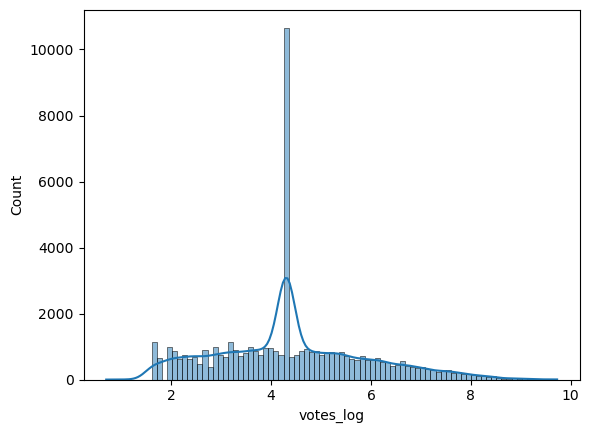

In [112]:
sns.histplot(Concerned_col['votes_log'],kde=True)

<Axes: xlabel='votes_log'>

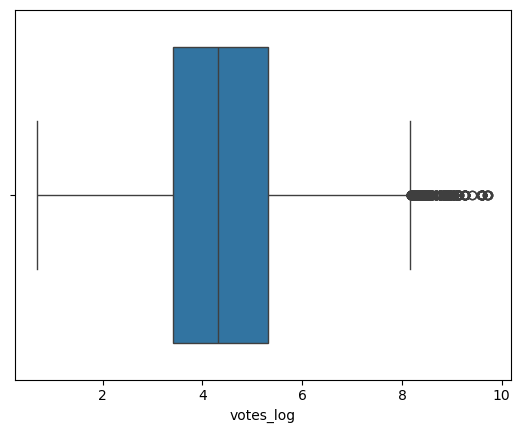

In [113]:
sns.boxplot(x='votes_log',data= Concerned_col)

In [114]:
Concerned_col.drop("votes", axis = 1 ,inplace =True )

In [115]:
Concerned_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     51295 non-null  object 
 1   book_table       51295 non-null  object 
 2   rate             51295 non-null  float64
 3   rest_type        51295 non-null  object 
 4   dish_liked       51295 non-null  object 
 5   cuisines         51295 non-null  object 
 6   AppCost_2humans  51295 non-null  float64
 7   menu_item        51295 non-null  object 
 8   listed_in(type)  51295 non-null  object 
 9   listed_in(city)  51295 non-null  object 
 10  votes_log        51295 non-null  float64
dtypes: float64(3), object(8)
memory usage: 4.7+ MB


# *Analysis and correlations*

## *Univariant Analysis*

In [116]:
Concerned_col.columns

Index(['online_order', 'book_table', 'rate', 'rest_type', 'dish_liked',
       'cuisines', 'AppCost_2humans', 'menu_item', 'listed_in(type)',
       'listed_in(city)', 'votes_log'],
      dtype='object')

### book_table

<Axes: xlabel='book_table', ylabel='count'>

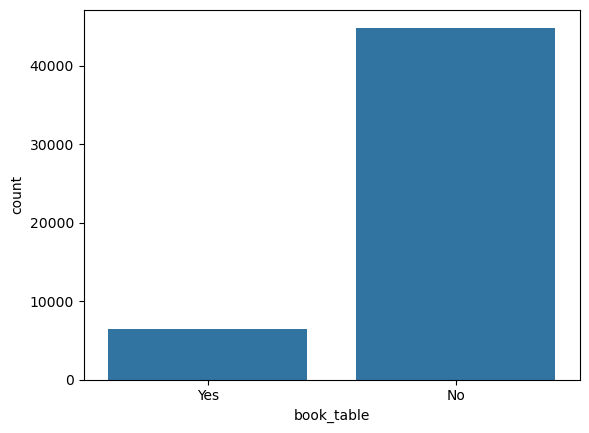

In [117]:
sns.countplot(x = 'book_table', data = Concerned_col)

### online_order

<Axes: xlabel='online_order', ylabel='count'>

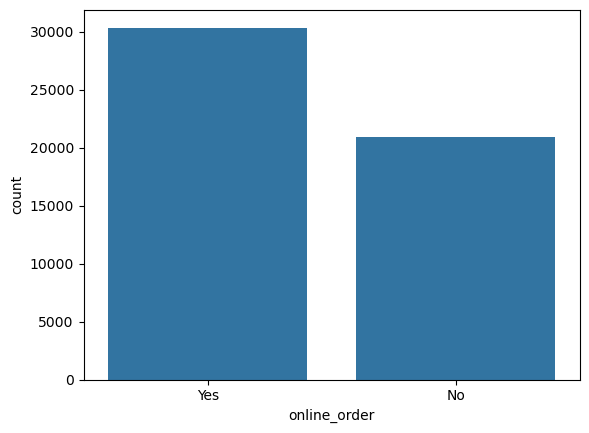

In [118]:
sns.countplot(x = 'online_order', data = Concerned_col)

In [119]:
#'address', 'online_order', 'book_table', 'rate', 'votes',
     #   'location', 'rest_type', 'dish_liked', 'cuisines',
   #    'approx_cost(for two people)', 'reviews_list', 'menu_item',
   #    'listed_in(type)', 'listed_in(city)'

### rate

<Axes: xlabel='rate', ylabel='Count'>

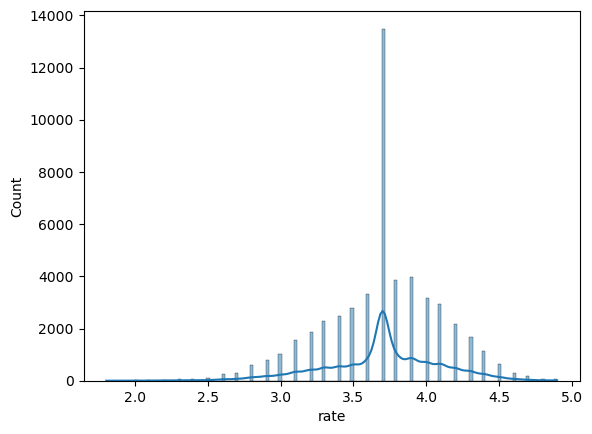

In [120]:
sns.histplot(Concerned_col['rate'],kde=True)

In [121]:
Concerned_col['rate'].unique()
Concerned_col['rate'].apply(np.isinf).unique()

array([False])

### votes

array([False])

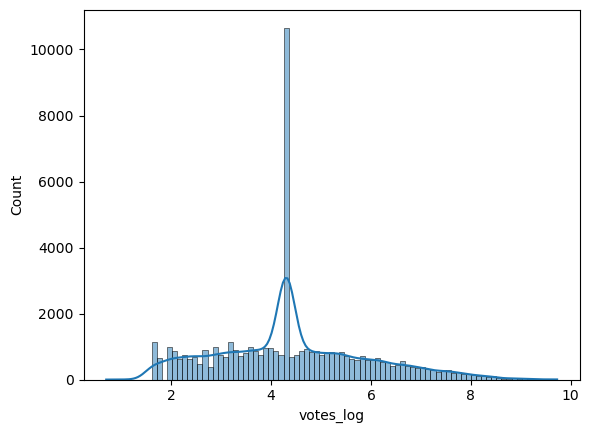

In [122]:
sns.histplot(Concerned_col['votes_log'],kde=True)
Concerned_col['votes_log'].apply(np.isinf).unique()

### AppCost_2humans

<Axes: xlabel='AppCost_2humans', ylabel='Count'>

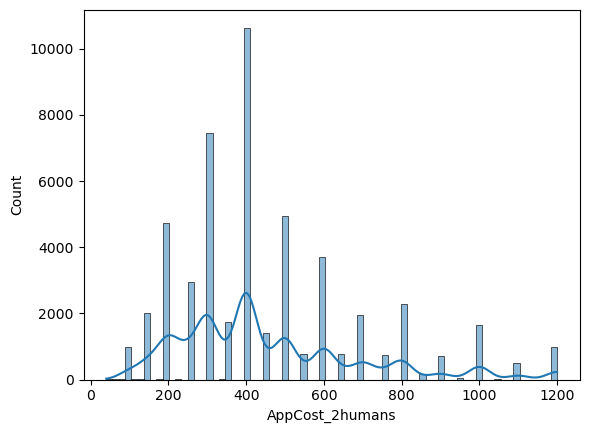

In [123]:
sns.histplot(Concerned_col['AppCost_2humans'],kde=True)

<Axes: xlabel='AppCost_2humans'>

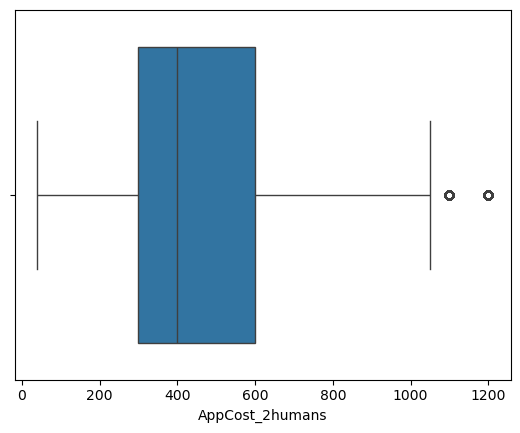

In [124]:
sns.boxplot(x='AppCost_2humans',data= Concerned_col)

In [125]:
Concerned_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     51295 non-null  object 
 1   book_table       51295 non-null  object 
 2   rate             51295 non-null  float64
 3   rest_type        51295 non-null  object 
 4   dish_liked       51295 non-null  object 
 5   cuisines         51295 non-null  object 
 6   AppCost_2humans  51295 non-null  float64
 7   menu_item        51295 non-null  object 
 8   listed_in(type)  51295 non-null  object 
 9   listed_in(city)  51295 non-null  object 
 10  votes_log        51295 non-null  float64
dtypes: float64(3), object(8)
memory usage: 4.7+ MB


In [126]:
numerical_col = Concerned_col.select_dtypes(include=['float64', 'int64'])
numerical_col = numerical_col[['rate', 'votes_log' , "AppCost_2humans"]]

In [127]:
Concerned_col['AppCost_2humans'].apply(np.isinf).unique()

array([False])

In [128]:
numerical_col['rate'].describe()

count    51295.000000
mean         3.700423
std          0.396896
min          1.800000
25%          3.500000
50%          3.700000
75%          3.900000
max          4.900000
Name: rate, dtype: float64

In [129]:
numerical_col['votes_log'].describe()

count    51295.000000
mean         4.407178
std          1.521318
min          0.693147
25%          3.401197
50%          4.304065
75%          5.308268
max          9.731097
Name: votes_log, dtype: float64

In [130]:
numerical_col['AppCost_2humans'].describe()

count    51295.000000
mean       457.046008
std        241.526185
min         40.000000
25%        300.000000
50%        400.000000
75%        600.000000
max       1200.000000
Name: AppCost_2humans, dtype: float64

In [131]:
numerical_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51295 entries, 0 to 51716
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate             51295 non-null  float64
 1   votes_log        51295 non-null  float64
 2   AppCost_2humans  51295 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB


In [132]:
numerical_col.isnull().sum()

rate               0
votes_log          0
AppCost_2humans    0
dtype: int64

# *Feature Engineering*

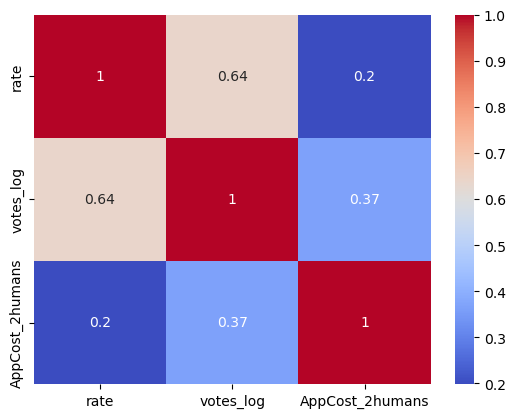

In [133]:
corr = numerical_col.corr()
mask = np.zeros_like(corr)
sns.heatmap(corr,annot=True,cmap='coolwarm',mask=mask)

plt.show()

#print(corr)

# *Encoding*

In [134]:
Concerned_col

,online_order,book_table,rate,rest_type,dish_liked,cuisines,AppCost_2humans,menu_item,listed_in(type),listed_in(city),votes_log
0,Yes,Yes,4.1,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,UnSpecified,Buffet,Banashankari,6.654153
1,Yes,No,4.1,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,UnSpecified,Buffet,Banashankari,6.669498
2,Yes,No,3.8,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,UnSpecified,Buffet,Banashankari,6.823286
3,No,No,3.7,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,UnSpecified,Buffet,Banashankari,4.488636
4,No,No,3.8,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,UnSpecified,Buffet,Banashankari,5.117994
...,...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,Bar,Biryani,Continental,400.0,UnSpecified,Pubs and bars,Whitefield,3.332205
51713,No,No,3.7,Bar,Biryani,Finger Food,600.0,UnSpecified,Pubs and bars,Whitefield,4.304065
51714,No,No,3.7,Bar,Biryani,Finger Food,400.0,UnSpecified,Pubs and bars,Whitefield,4.304065
51715,No,Yes,4.3,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,400.0,UnSpecified,Pubs and bars,Whitefield,5.468060


In [135]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load cleaned dataset
Concerned = Concerned_col.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['online_order', 'book_table', 'rest_type', 'dish_liked', 
                    'cuisines', 'menu_item', 'listed_in(type)', 'listed_in(city)']




In [136]:
for col in categorical_cols:
    le = LabelEncoder()
    Concerned[col] = le.fit_transform(Concerned[col])
    label_encoders[col] = le  # Save for later

# Define a new success metric (considering multiple columns)
median_votes = Concerned['votes_log'].median()
Concerned['success'] = ((Concerned['rate'] > 3.5) & 
                 (Concerned['votes_log'] > median_votes) & 
                 (Concerned['online_order'] == 1)).astype(int)






## Splitting data into train and test

In [137]:
# Split into train and test sets
X = Concerned.drop(columns=['success'])
y = Concerned['success']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing

In [138]:

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['rate', 'AppCost_2humans', 'votes_log']
X_train_num = scaler.fit_transform(X_train[numerical_cols])
X_val_num = scaler.transform(X_val[numerical_cols])

# Drop 'rate' column after scaling (if needed)
#X_train.drop(columns=['rate'], inplace=True)
#X_val.drop(columns=['rate'], inplace=True)

# Convert categorical features using One-Hot Encoding
X_train_cat = pd.get_dummies(X_train.drop(columns=numerical_cols))  # Exclude numerical columns
X_val_cat = pd.get_dummies(X_val.drop(columns=numerical_cols))

# Ensure the same columns in train & validation sets
X_train_cat, X_val_cat = X_train_cat.align(X_val_cat, join='left', axis=1, fill_value=0)

# Combine numerical and categorical features
X_train = np.hstack((X_train_num, X_train_cat.values))
X_val = np.hstack((X_val_num, X_val_cat.values))


# Model Training and Prediction

In [139]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Train model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),  # Input layer
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])
# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)





C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7224 - loss: 6.5680 - val_accuracy: 0.7682 - val_loss: 1.7582
Epoch 2/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7798 - loss: 1.1103 - val_accuracy: 0.8153 - val_loss: 0.4591
Epoch 3/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7982 - loss: 0.6098 - val_accuracy: 0.7643 - val_loss: 0.6053
Epoch 4/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8113 - loss: 0.4480 - val_accuracy: 0.7614 - val_loss: 0.5388
Epoch 5/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8251 - loss: 0.3632 - val_accuracy: 0.8286 - val_loss: 0.3452
Epoch 6/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8475 - loss: 0.3282 - val_accuracy: 0.8436 - val_loss: 0.3227
Epoch 7/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8527 - loss: 0.3177 - val_accuracy: 0.8372 - val_loss: 0.3781
Epoch 8/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8550 - loss: 0.3038 -

# Model Evaluation 

In [142]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f"Test Accuracy: {test_acc*100:.2f}")

321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9343 - loss: 0.1574
Test Accuracy: 93.54
